<a href="https://colab.research.google.com/github/Matinsalami/Projects/blob/main/House_price_prediction/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the Data

## Download the data

In [ ]:
import os   # To work with OS
import tarfile # for handling .tar files
import urllib.request # To download files from the internet

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a qucik look at the Data Strcuture

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

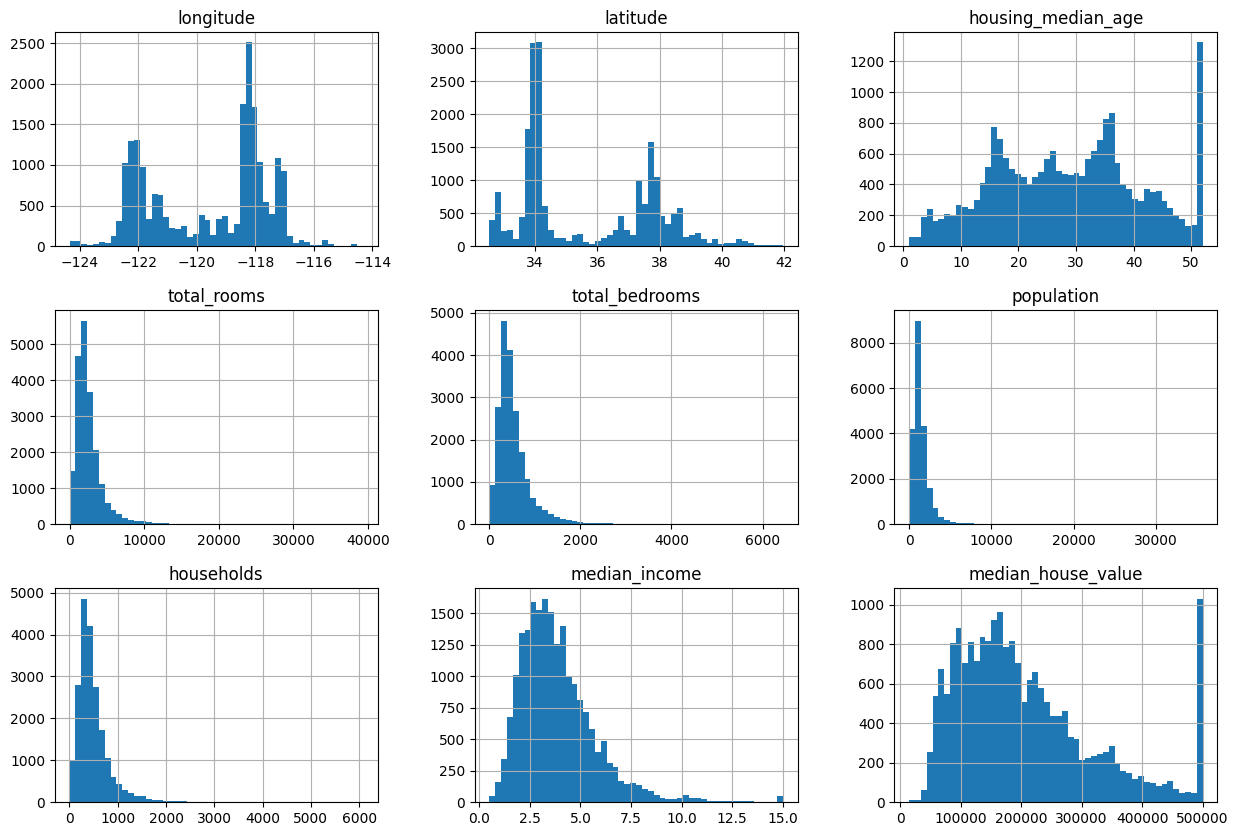

In [ ]:
housing.hist(bins=50, figsize=(15,10)) # bins is the number of intervals for ecah histogram
plt.show()

<Axes: >

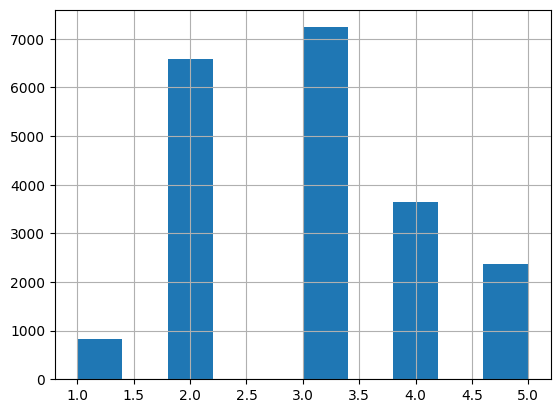

In [ ]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5]) # Add a new column which represent which interval the income belongs to
housing["income_cat"].hist()

## Create a test set

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
# label 3 has the highest frequency and label 1 has the lowest one

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
# Now we remove the column in the data
for set_ in (strat_test_set, strat_train_set):
  set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the Data to Gain Insights

## Visualizing Geographical Data

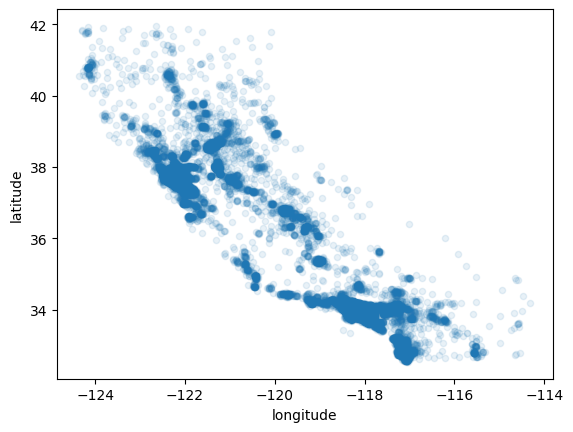

In [ ]:
housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

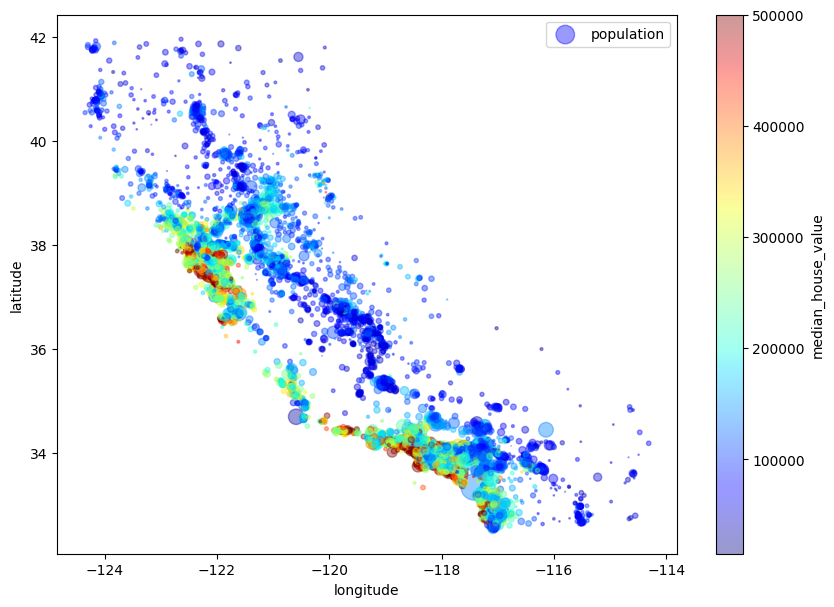

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

## Looking for Correlations

In [ ]:
corr_matrix = housing.drop("ocean_proximity", axis=1, inplace=False).corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


In [ ]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

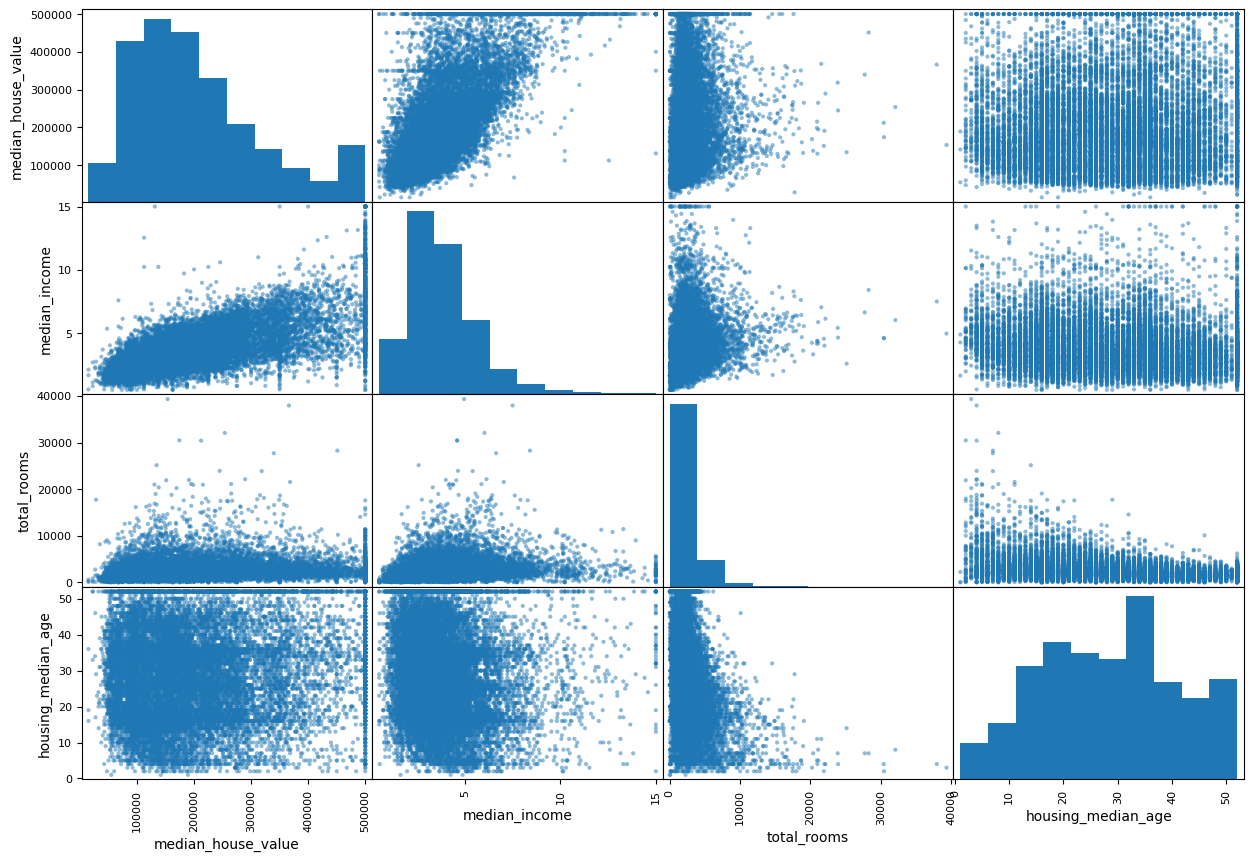

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,10))

<Axes: xlabel='median_income', ylabel='median_house_value'>

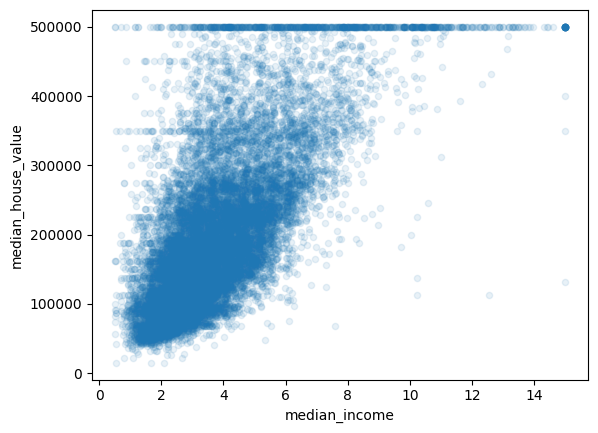

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [ ]:
# A function to remove the rows with median house value more than 500000 and with some suspecious values
def clean_capped_house_values(df):
    """
    Removes capped and suspicious median house values from the dataset.
    Returns a cleaned copy of the DataFrame and prints how many rows were removed.
    """
    original_count = len(df)

    # Step 1: Remove hard cap at 500000
    df = df[df["median_house_value"] < 500000.0]

    # Step 2: Remove suspicious specific values
    suspicious_values = [450000.0, 350000.0, 280000.0]
    df = df[~df["median_house_value"].isin(suspicious_values)]

    # Step 3: Reporting
    cleaned_count = len(df)
    removed_count = original_count - cleaned_count
    print(f"🧹 Cleaned dataset:")
    print(f"- Original rows: {original_count}")
    print(f"- Cleaned rows: {cleaned_count}")
    print(f"- Rows removed: {removed_count}")

    return df


🧹 Cleaned dataset:
- Original rows: 16512
- Cleaned rows: 15607
- Rows removed: 905


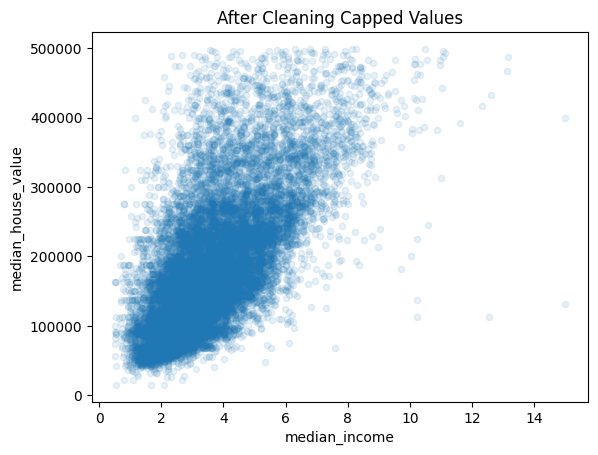

In [ ]:
# Make sure you keep your original DataFrame
housing_original = housing.copy()

housing = clean_capped_house_values(housing_original)

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.title("After Cleaning Capped Values")
plt.show()


## Experimenting with Attriute Combinations

In [ ]:
# Here we have a class to perform attrbute combination. which will be used in transformation pipelines

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
      bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Prepare the Data for Machine Learning Algorithms

In [ ]:
#For preparing the data we drop the labels from the dataset
housing_labels = housing['median_house_value'].copy()
housing = housing.drop("median_house_value", axis=1)

## Data Cleaning, Combining Attributes and Feature scaling

In [ ]:
#First we need to remove the "ocean_proximity" attriute as we only work with numerical attributes. Then with a transformation pipeline we take care of all numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# A pipeline with all the transformers for numerical attributes
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('attribs_adder', CombinedAttributesAdder()), ('std_scalar', StandardScaler())])

## Handling Text and Caegorical Attributes

In [ ]:
# Be careful that housing_cat must be a 2-D array
housing_cat = housing[['ocean_proximity']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

## Final transformation pipeline

In [ ]:
# Here we basically fit_transform the transformers and combine numerical and categorical attributes
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-0.94792783,  1.3289964 ,  0.0531951 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16399437, -1.19141812, -1.71083323, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26031135, -0.13312252,  1.25594168, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.57701104,  1.29186322,  1.57667411, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56702559,  1.23152181, -1.14955149, ...,  0.        ,
         0.        ,  0.        ],
       [-1.28743305,  2.00203527, -0.10717111, ...,  0.        ,
         0.        ,  0.        ]])